TCPServer Waiting for client on port 9999
I got a connection from  ('172.16.26.172', 64376)
b'kz)\x8cB\xcb\xb2dY\xb6\x1d\xfb;\x97/\x9f=}\xd64\xcc7\xdf|\xb3R\xa9\xfc\xd8\x8f~"\x9b\xc9n\xedl\xbd\xfa\xea\xb7\xbf\xfd\xea\xab\xba\xa6w:m\x8cp\x1cG\xdf\xfc\xe67\x97\x97\x96S)\xeb\xca\xd5\xab\x13\x13\x93GWV\x1e{\xec\xe2\xf6\xce\x8e\xa6i\xbd^/\x9b\xc9\x00Y6\x0c\xd34\xad\xb9\xf9\xf9\xd1hD\x08Y_\xdf\xd8\xde\xde\\X\x98\xfb\xf5_\xff\xa7\x92,\xff\xe9\x9f\xfc\xe9\x8f\xfd\xd8\'\xbe\xf9\xca\xb7\xbe\xf3\xc65\x88\xa0\x10\x02p\x00 \x80\x10\x88w?[\x08\x8e\x9f8\xfe\xcc3OONM\x9d<q\xc2\xb4\xac0\x0c\x03\xdf\xb7\x07\xc3~\xaf\x9f$\xc9\xd4\xd4$\x84\xe8\xdc\xd9\xb3D"\x83~\xdf\x1e\xd9\xaa\x8c\x93(,\x97+\x99t*\x9d\xc9H\x92\x14\x84amf\xfeO\xbe\xfc\xa5\x89\xa9\xa9\xd1p\xe8\xf9^\xb7\xd3\x15\x9c\x1f\x1e\xd6\x9fz\xea\xa9$I\xbe\xf8\xc5/1\xc1-\xcb\x02B\x98\xa6y\xf2\xf8\x89R&3U)=\xb8{WQ\x94Z\xad:5==?\xbfp\xe5\xea\x95\xd1h\x94\xcbf\xa7\xa7\xa7\xae\\\xb9\xf2\xfc\xf3/\xec\xed\xed\xdc\xb9s?W\xc8\xbf\xf2\xfa\xabz6\x1d\x84\xe1\x89

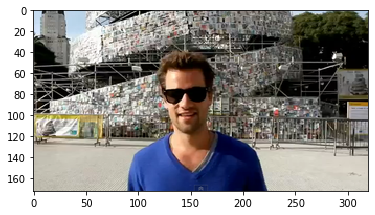

Finished 
SOCKET closed... END


In [66]:
#darame 어플 서버 
#기능1: mosaic 할 사진 받기, composite할 전경/배경 사진 받기 (android->python)
#기능2: image instance 결과 전송하기 (python -> android), 최종 결과 전송
#기능3: 사용자가 터치한 좌표 받아오기 (android->python)

from socket import *
import socket
import os
import time
import sys
import base64
import io
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import darame_instance_segmentation
import darame_mosaic_selected

def main():


HOST = "172.16.26.172" # Symbolic name meaning all available interfaces
PORT = 9999 # Arbitrary non-privileged port
 
BACKLOG = 10

foreground_path = "C:/Users/4/Downloads/CNN-PhotoEditor-App-master/darame/img/foreground/"
background_path = "C:/Users/4/Downloads/CNN-PhotoEditor-App/darame/img/background/"


#서버 소켓 오픈
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.bind((HOST, PORT))
server_socket.listen(BACKLOG)
print("TCPServer Waiting for client on port 9999")


    # 클라이언트 요청 대기중 .
    
client_socket, address = server_socket.accept()
    # 연결 요청 성공
print("I got a connection from ", address)

data = None

    # Data 수신

recv_data = client_socket.recv(1024)
data = recv_data


while (recv_data):
    recv_data = client_socket.recv(1024)
    data += recv_data
    #print(recv_data)
        
# 받은 데이터 저장

print("finish img recv")
print(sys.getsizeof(data))
#print(data)
    
#i = base64.b64decode(data)
i = io.BytesIO(data)
i = mpimg.imread(i, format='JPG')

plt.imshow(i, interpolation='nearest')
plt.show()

Image.fromarray(np.array(i).astype(np.uint8)).save(foreground_path + "mosaic.png")

print("Finished ")

client_socket.close()
print("SOCKET closed... END")
